In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv("/content/Google_Stock_Price_Train.csv")
data.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
#data = data.drop(['Date'], axis=1)
#data.head(5)

In [ ]:
training_set = data.iloc[:, 1:2].values
training_set.shape

(1258, 1)

In [ ]:
scaler  = MinMaxScaler(feature_range=(0,1))
training_set = scaler.fit_transform(training_set)
training_set.shape

(1258, 1)

In [ ]:
xtrain = []
ytrain = []
for i in range(60, 1258):
  xtrain.append(training_set[i-60:i, 0])
  ytrain.append(training_set[i, 0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
'''This line tells the model how to improve during training by using the Adam optimizer
(which is a popular method to adjust weights) and measuring errors with mean squared error
 (a common way to calculate the difference between predicted and actual values)'''

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(xtrain, ytrain, epochs=50, batch_size=32)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - loss: 0.0817
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0065
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0047
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0053
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0047
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0049
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0045
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0065
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - loss: 0.0045
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0040
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - loss: 0.0046
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0046
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - loss: 0.0037
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0042
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - l

In [ ]:
data_test = pd.read_csv("/content/Google_Stock_Price_Test.csv")
actual_stock_price = data_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((data['Open'], data_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
xtest = []
for i in range(60, 80):
  xtest.append(inputs[i-60:i, 0])
xtest = np.array(xtest)

In [ ]:
predicted_stock_price = regressor.predict(xtest)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


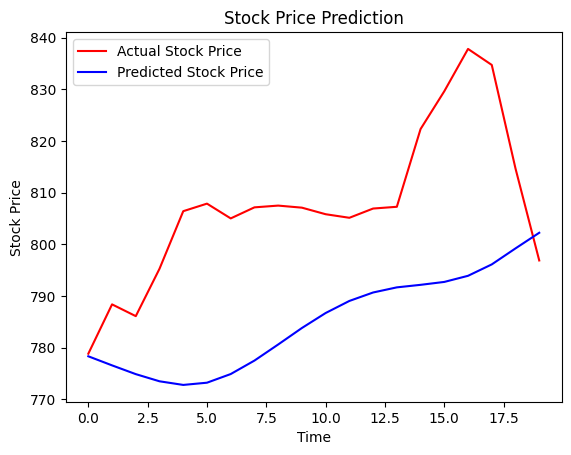

In [ ]:
plt.plot(actual_stock_price, color='red', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()